In [3]:
from nltk.tokenize import word_tokenize
import nltk
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from gensim.models.wrappers import FastText
from wikipedia2vec import Wikipedia2Vec
import torch

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
documents = pd.read_csv('train.csv')

In [95]:
documents

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [7]:
model = Wikipedia2Vec.load('./enwiki_20180420_300d.pkl')
model.get_word_vector('trash')

memmap([-0.12371514,  0.04291734,  0.32880002, -0.16979389,  0.07798263,
        -0.434905  , -0.20123899,  0.2908261 ,  0.08722368, -0.01311676,
         0.03100661,  0.06784146, -0.10104007,  0.05850407,  0.16548222,
         0.08658054, -0.60811365, -0.11604528, -0.27880418,  0.5378464 ,
        -0.04813397,  0.1499427 ,  0.22319765, -0.00102038,  0.00765151,
         0.16189177, -0.07079617,  0.25696877, -0.16503079, -0.3908718 ,
         0.0489009 ,  0.43215597, -0.23331866,  0.17961967, -0.03609848,
         0.06691864,  0.62597436, -0.24434146,  0.3396473 , -0.17995422,
        -0.3429679 , -0.18863471,  0.3096196 , -0.03396757, -0.41085696,
        -0.26007023,  0.02174138,  0.34613386, -0.37167326,  0.16421154,
        -0.21386307, -0.2817541 , -0.18266954, -0.06549256,  0.11822449,
        -0.23614788, -0.05696819, -0.06619099, -0.03271987, -0.17871535,
         0.2755599 ,  0.05279215,  0.11753208, -0.03387453, -0.04365014,
         0.17477167,  0.16678111, -0.1455879 ,  0.3

In [8]:
documents.iloc[6,:].values[1]

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [9]:
line = word_tokenize(documents.iloc[6,:].values[1])
line = list(map(str.lower, line))
model.get_word_vector(line[0])

memmap([-0.36777872,  0.4109074 , -0.28155106,  0.45166647,  0.11502699,
        -0.25298506, -0.3498663 ,  0.2094816 , -0.22806048, -0.02379434,
         0.17238143,  0.19643864, -0.02321672,  0.05538562, -0.108629  ,
        -0.15897007, -0.62588555, -0.06143674, -0.15518166,  0.0358622 ,
         0.02622124,  0.3707957 ,  0.50820106,  0.00946084,  0.16467492,
         0.14478618, -0.12490515, -0.14495854, -0.05301759,  0.03866079,
        -0.06182896,  0.10599335, -0.02897676, -0.51409554, -0.0017056 ,
         0.11983052,  0.38848922, -0.14517549,  0.65245366, -0.30381703,
        -0.11981307,  0.06781227,  0.12014686, -0.3571657 , -0.52973044,
        -0.28241977,  0.15605558,  0.24977963, -0.61448294, -0.07867463,
        -0.06368928, -0.11056993, -0.45702854,  0.77721673,  0.26282415,
         0.01614565, -0.01972437, -0.08186976, -0.0130535 , -0.2424196 ,
         0.01599565, -0.04030436, -0.02045289,  0.2263624 ,  0.19410142,
        -0.10982206,  0.2397274 , -0.2708976 ,  0.0

In [10]:
doc = np.array(list(map(model.get_word_vector, line)))

In [11]:
doc.shape

(8, 300)

In [12]:
docs_encoded = []
wordss = []
for i,doc in documents.iterrows():
    wordss.append(word_tokenize(doc['comment_text']))
    print('{:>5}\r'.format(i),end='')

In [18]:
samples = []
removed = []
for word in wordss:
    emb = []
    for token in word:
        try:
            emb.append(model.get_word_vector(str.lower(token)))
        except:
            removed.append(str.lower(token))
    samples.append(np.array(emb))

In [19]:
samples[0].shape

(42, 300)

In [68]:
class Layer(torch.nn.Module):
    def __init__(self, size_in, size_out, activation):
        super(Layer, self).__init__()
        self.weights = torch.nn.Parameter(
            torch.randn(size_in, size_out, requires_grad=True)
        )
        self.bias = torch.nn.Parameter(
            torch.randn(1, size_out, requires_grad=True)
        )  
        self.activation = activation
        
    def forward(self, z_in):
        return self.activation(z_in @ self.weights + self.bias)

In [81]:
class LSTM(torch.nn.Module):
    def __init__(self, size_in, size_out, size_long, size_short):
        super().__init__()
        size_cat = size_in + size_short
        self.forget_gate = Layer(size_cat, size_long, torch.sigmoid)
        self.memory_gate = Layer(size_cat, size_long, torch.sigmoid)
        self.memory_tanh = Layer(size_cat, size_long, torch.tanh)
        self.recall_gate = Layer(size_cat, size_short, torch.sigmoid)
        self.recall_tanh = Layer(size_long, size_short, torch.tanh)
        self.output = Layer(size_short, size_out, lambda z: z)
        self.size_short = size_short
        self.size_long = size_long
        
    def forward(self, x):
        memory_long  = torch.zeros((1, self.size_long))
        memory_short = torch.zeros((1, self.size_short))
        out = []
        
        for t in range(x.shape[0]):
            x_t = x[[t], :]
            z_t = torch.cat([x_t, memory_short], axis=1)
            
            forget_gate = self.forget_gate(z_t)
            
            memory_long = memory_long * forget_gate
            
            memory_gate = self.memory_gate(z_t)
            memory_tanh = self.memory_tanh(z_t)
            memory = memory_gate * memory_tanh
            
            memory_long = memory_long + memory
            
            recall_gate = self.recall_gate(z_t)
            recall_tanh = self.recall_tanh(memory_long)
            
            memory_short = recall_gate * recall_tanh
            
        y_hat = self.output(memory_short)
        out.append(y_hat)
            
        return torch.cat(out, axis=0)
    
    def Predict(self, x, t=0.5):
        return torch.sigmoid(self.forward(x)) > t

In [90]:
n_samp = np.array(samples)

In [116]:
lstm = LSTM(300, 6, 20,20)
y = torch.Tensor(documents[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values)
loss_func = torch.nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(lstm.parameters(), lr=0, )
y[0,:].shape

torch.Size([6])

In [117]:
iterations=2000
losses = [np.inf]
batch_size = 1
for i in range(iterations):
    print('{:>5} | {:>12.3}\r'.format(i, losses[-1]), end='')
    idx = np.random.permutation(len(samples))
    comments = n_samp[idx[:batch_size]]
    targets = y[idx[:batch_size], :]
    loss = 0
    for comment, target in zip(comments, targets):
        y_hat = lstm(torch.Tensor(comment))
        loss = loss_func(y_hat[0,:], target)
        loss.backward()
        losses.append(loss.detach())
    optim.step()
    optim.zero_grad()

KeyboardInterrupt: 

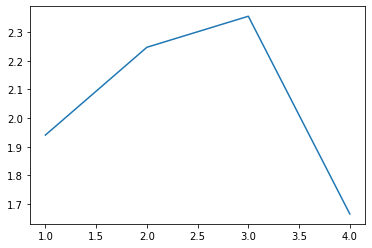

In [118]:
plt.plot(losses)

In [ ]:
comments = documents['comment_text'].sample(batch_size).values

In [110]:
pd.DataFrame(samples[0]).isnull().sum().sum()

0

In [112]:
check = False
for s in samples:
    if pd.DataFrame(s).isnull().sum().sum() > 0:
        check = True
        break
check

False

In [130]:
x = []
for tok in list(map(str.lower, word_tokenize(documents.iloc[0,1]))):
    try:
        x.append(model.get_word_vector(tok))
    except:
        pass
x = np.array(x)
x.shape

(42, 300)

In [131]:
def get_x(comment):
    x = []
    for tok in list(map(str.lower, word_tokenize(comment))):
        try:
            x.append(model.get_word_vector(tok))
        except:
            pass
    return torch.Tensor(x)

In [132]:
get_x(documents.iloc[0,1])

tensor([[-0.2120,  0.1692, -0.0911,  ...,  0.2050,  0.0318,  0.0045],
        [-0.0511,  0.6501, -0.2835,  ...,  0.1183, -0.0325,  0.1904],
        [-0.2430, -0.0432, -0.0333,  ..., -0.0283, -0.0504, -0.3401],
        ...,
        [-0.3116, -0.1016, -0.0405,  ...,  0.0661, -0.0909, -0.2687],
        [-0.0506,  0.7150, -0.0307,  ..., -0.0774, -0.3192, -0.0046],
        [-0.2817,  0.0181, -0.0265,  ..., -0.2772, -0.0566,  0.3437]])